MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_1.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_2.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_3.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_4.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_5.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_6.mp3


MoviePy - Done.
MoviePy - Writing audio in C:\Users\Kenechukwu\Videos\usertesting\output4391005D\segment_7.mp3


MoviePy - Done.
Sentence 1-1: researching a specific product app service or tool during your search you come across truly as a way to compare and find your reviews on your product you'll be asked to give feedback on various pages on the truly website please explore the answer the questions as though you are actually using the site to get info in the product or service homepage and share your feedback on anything that stands out

Sentence 1-2: okay just opening the first interface the site uses cookies I like that you can search right from the first interface

Sentence 1-3: but I'm going to just scroll down and see what else is here ok continue sleeping reviews from all top review sites

Sentence 1-4: okay

Sentence 1-5: so you're going to get reviews from a bunch of other sites which I like 30% of online reviews are fake we remove them great to know pros and cons find product ranking list to always pick the best okay truly is like a superpower for discovering and choosing the right pro

Sentence 5-1: the page and the UI but probably won't read all of this unless I'm seriously considering this platform at this moment screen skim over key facts pros and cons

Sentence 5-2: okay cool easy to use email templates

Sentence 5-3: okay cool customer service is bad again and then just waiting free version interesting the free version I mean

Sentence 5-4: yeah

Sentence 5-5: okay

Sentence 5-6: again I'm going to scroll down again skim over these can't contact support for any of these crms and same with hubspot again since I am familiar with hubspot just give in my professional life again going to use this as a baseline I like that all this information after all the reviews most views comparisons I almost wish navigating to comparisons was a little bit higher up and easier accessible closer to like the top 10 rankings the comparisons was something I was immediately interested in the homepage but admittedly kind of forgot about it now that I'm looking you know

Sentence 5-7: th

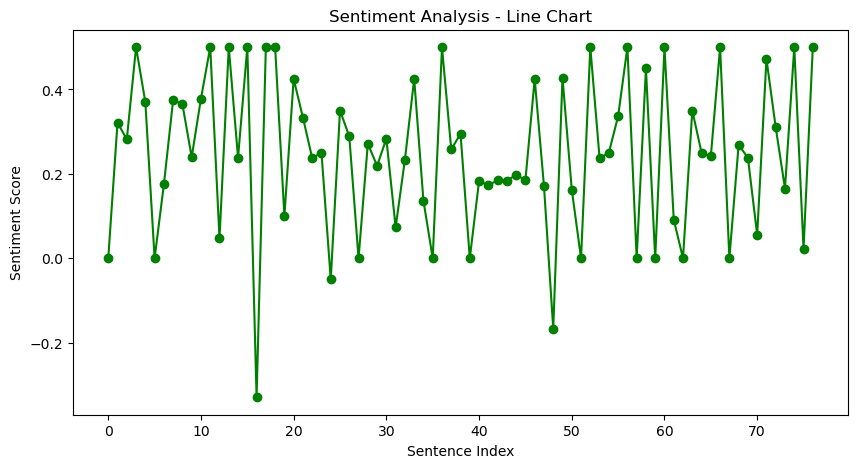

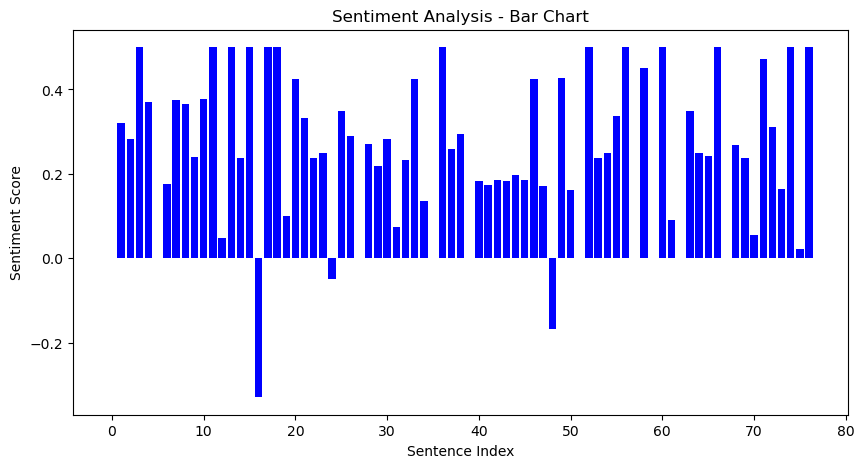

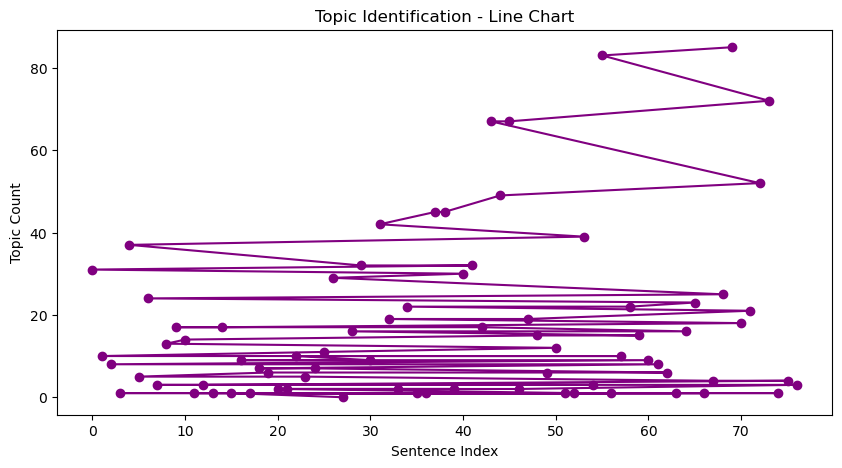

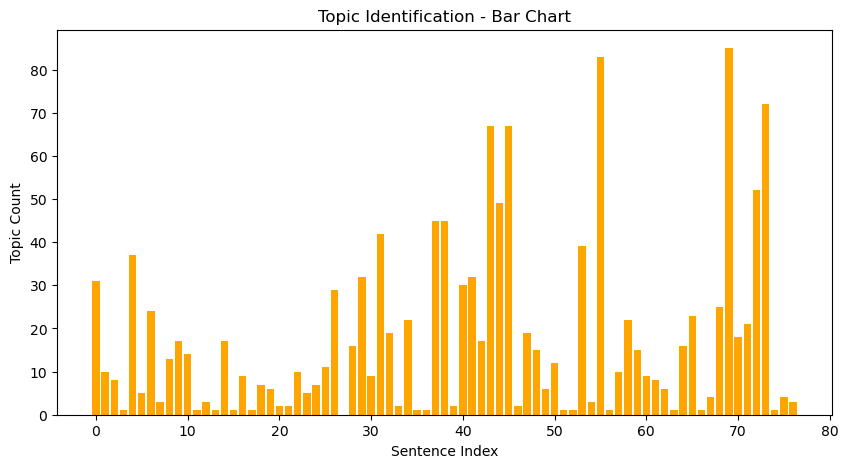

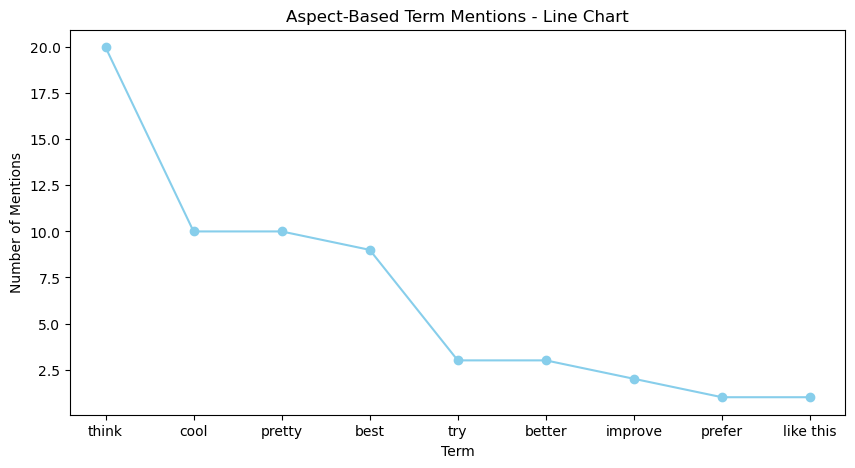

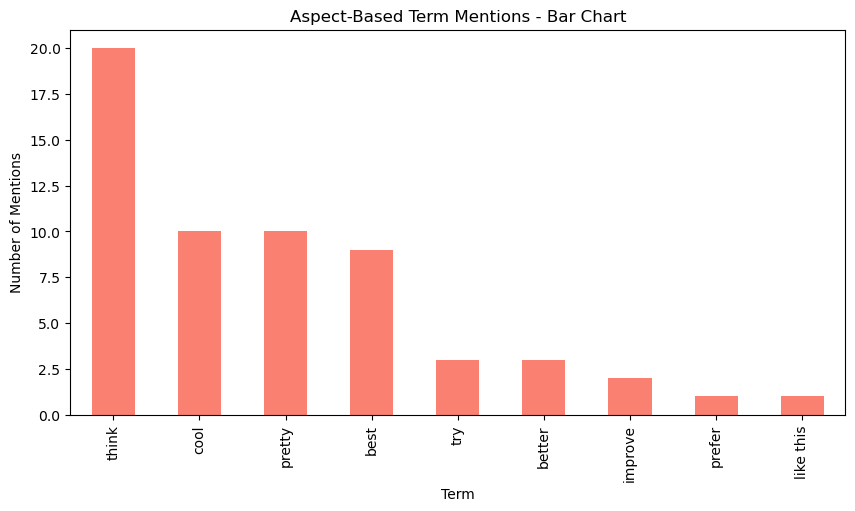

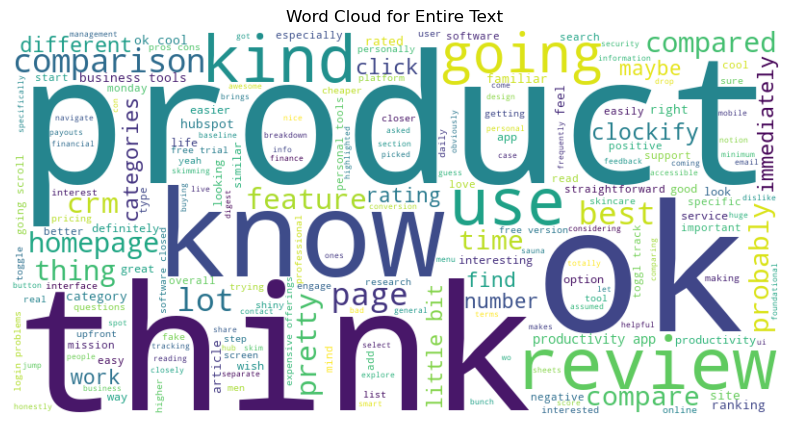

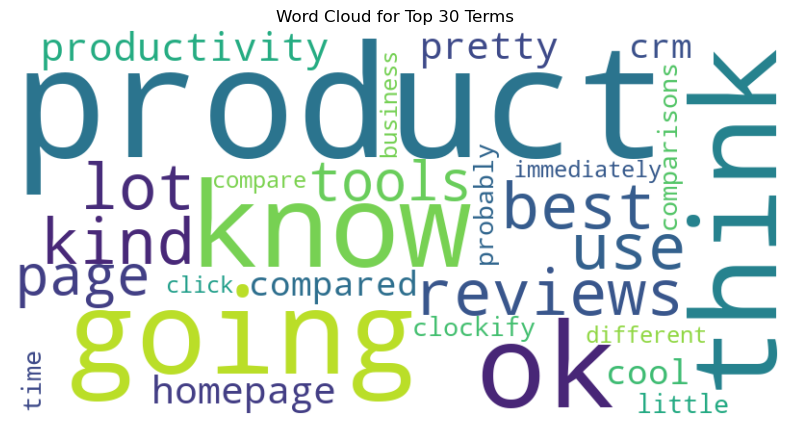

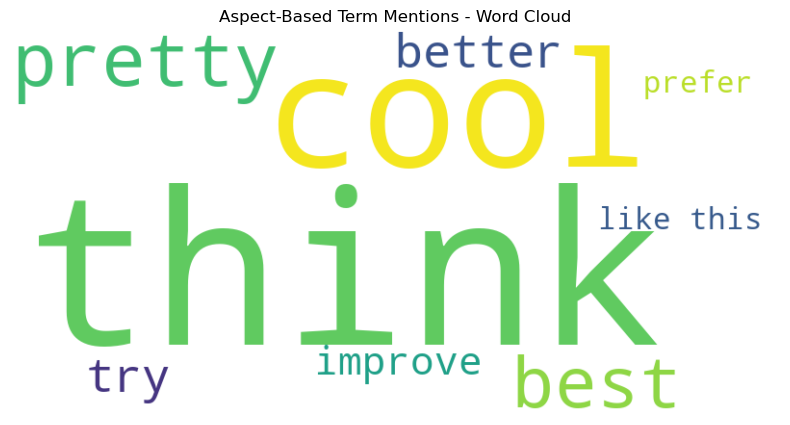

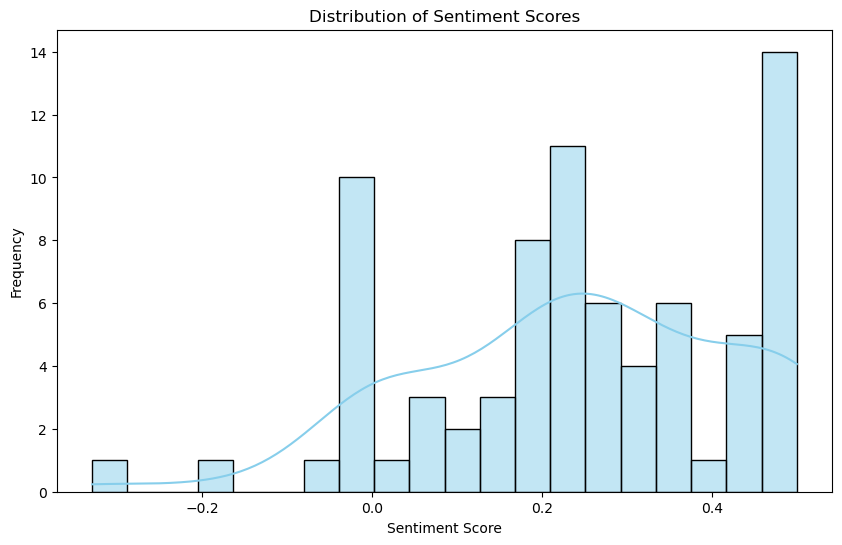

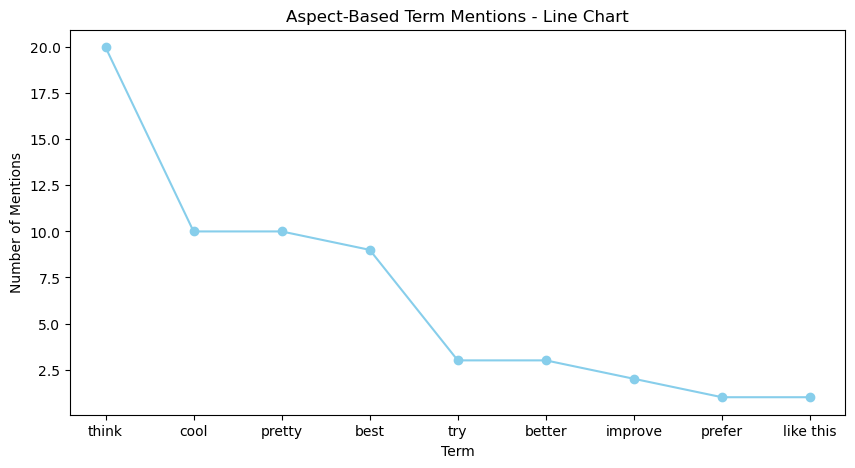

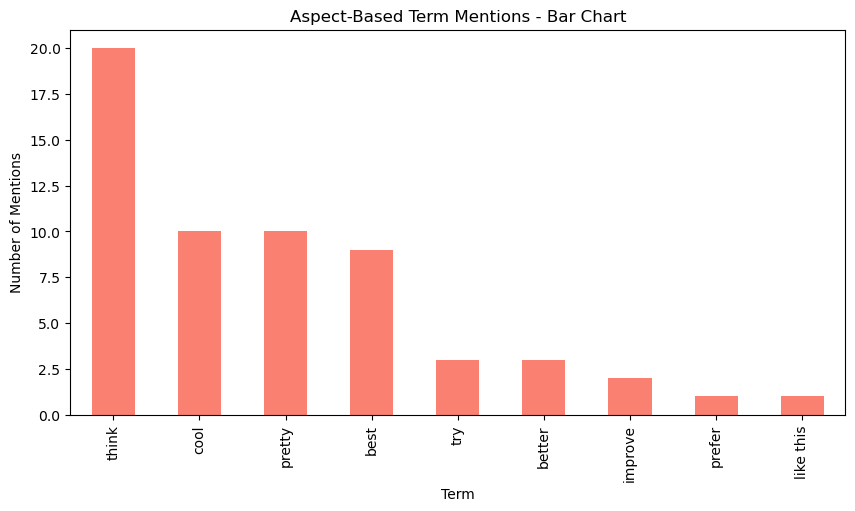

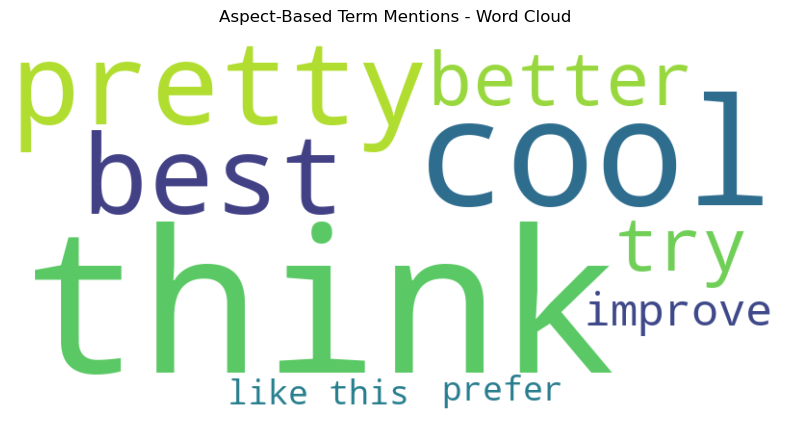

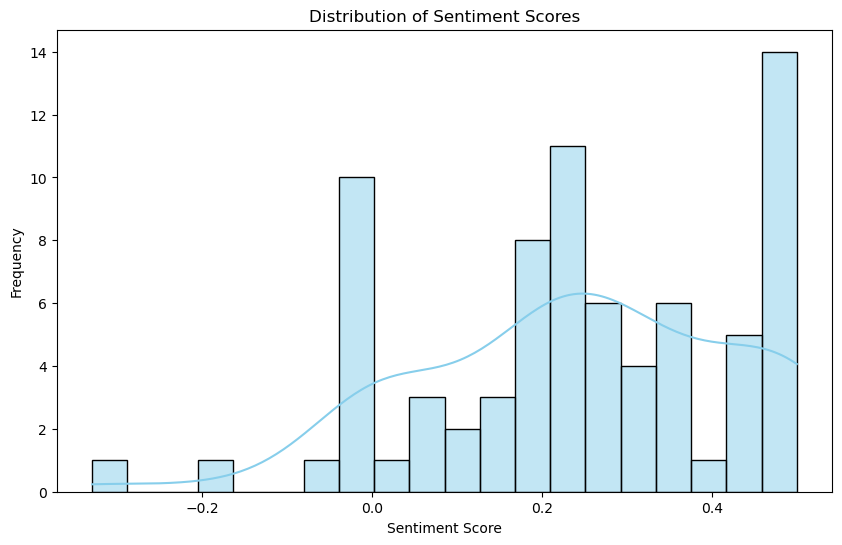

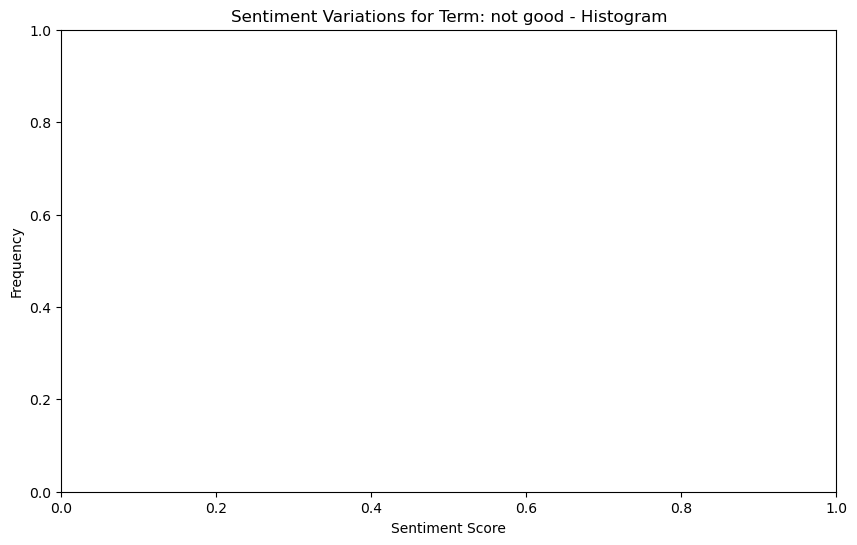

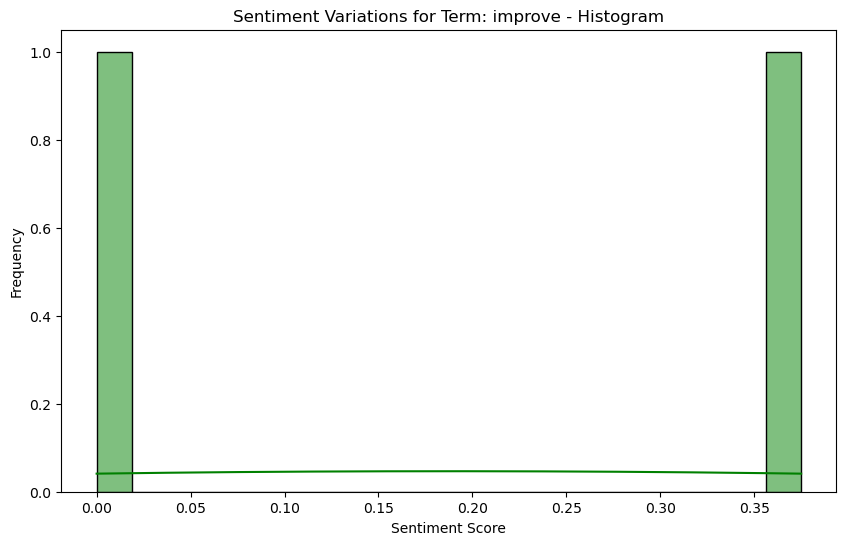

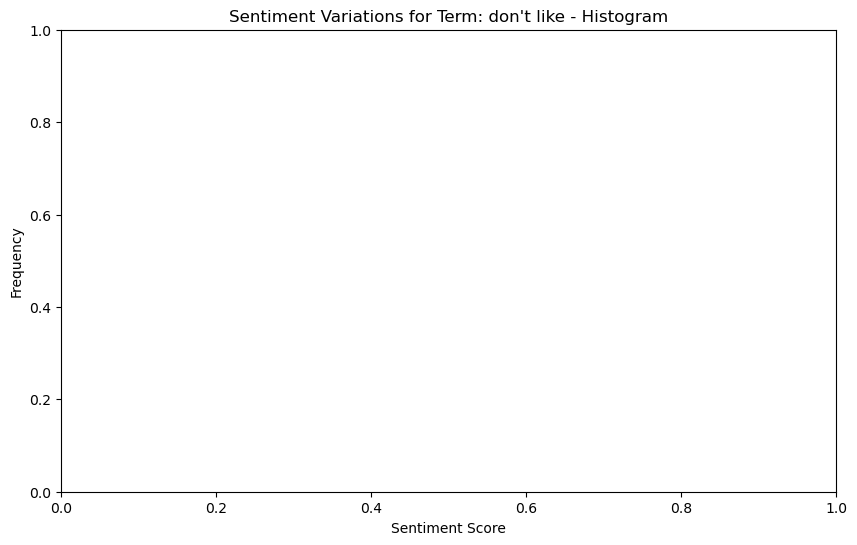

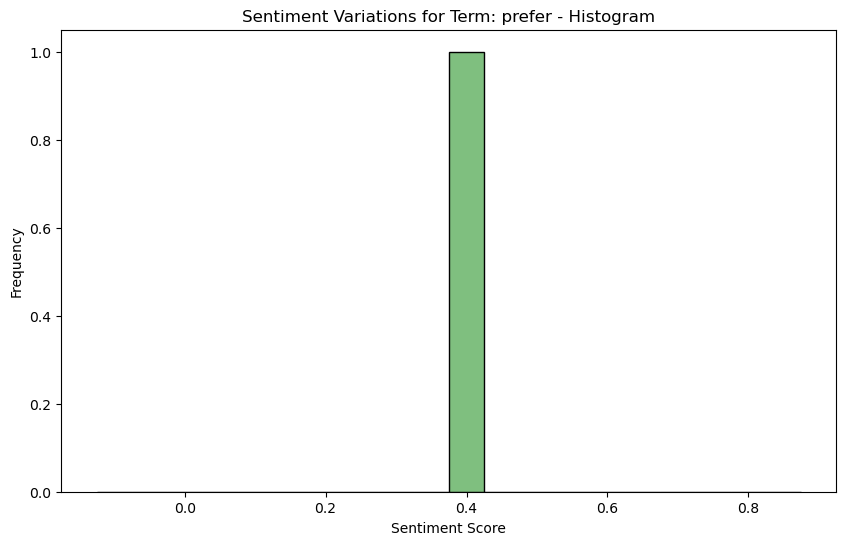

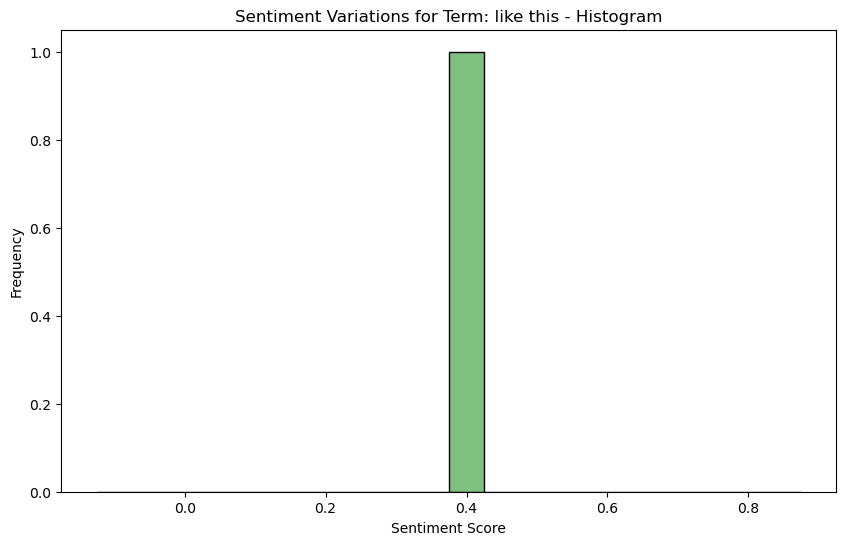

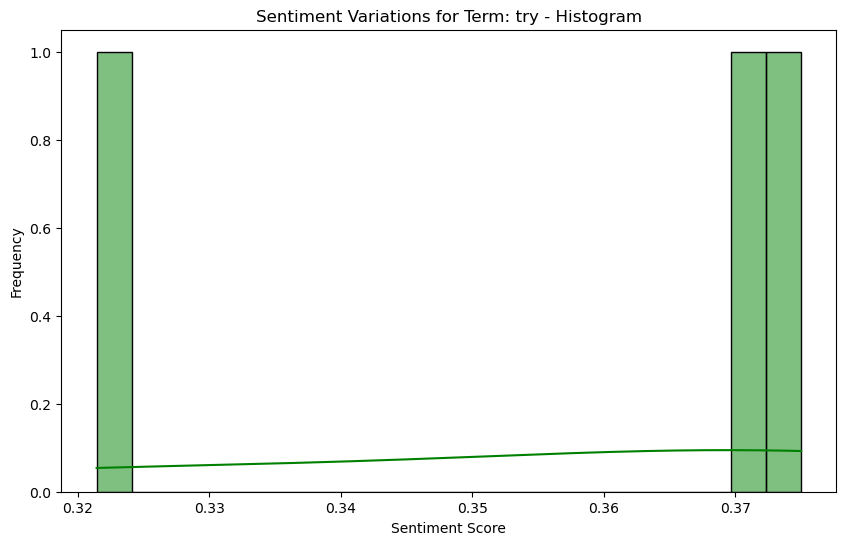

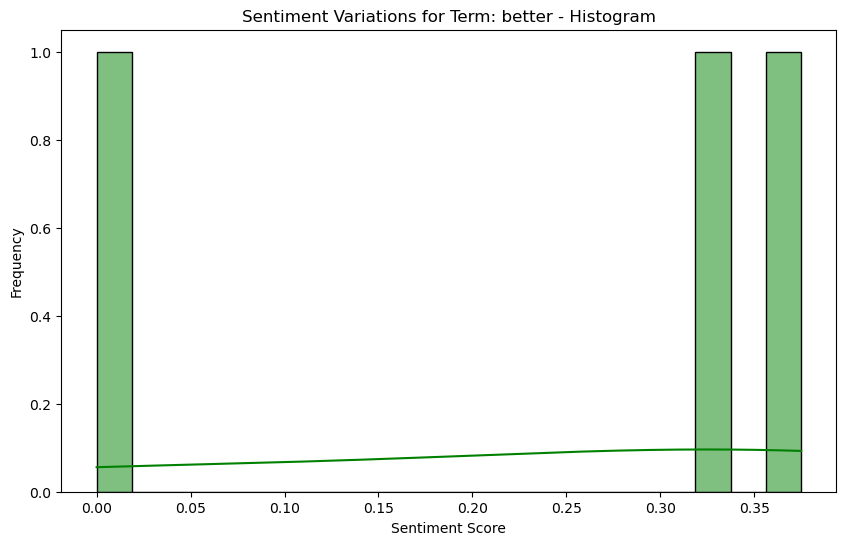

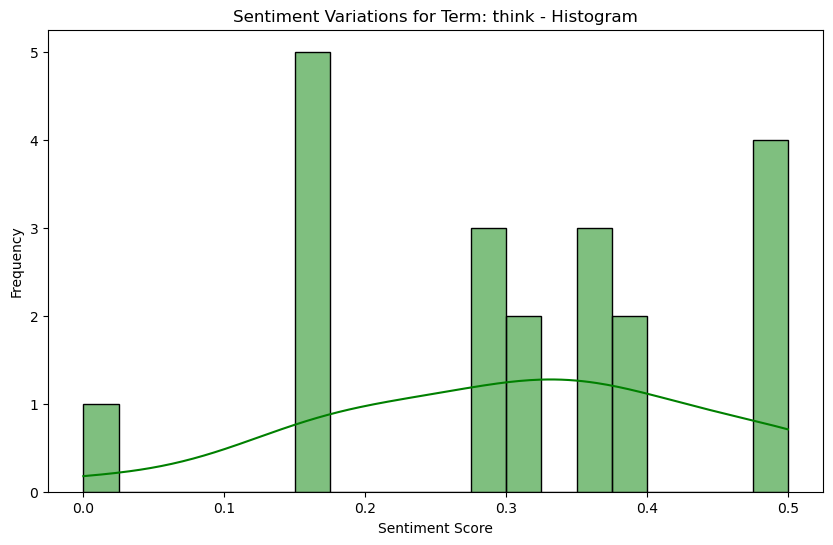

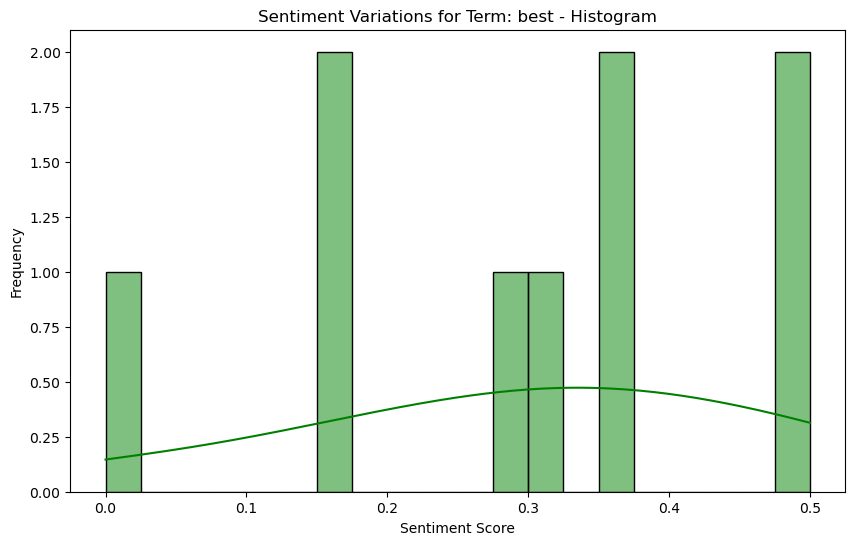

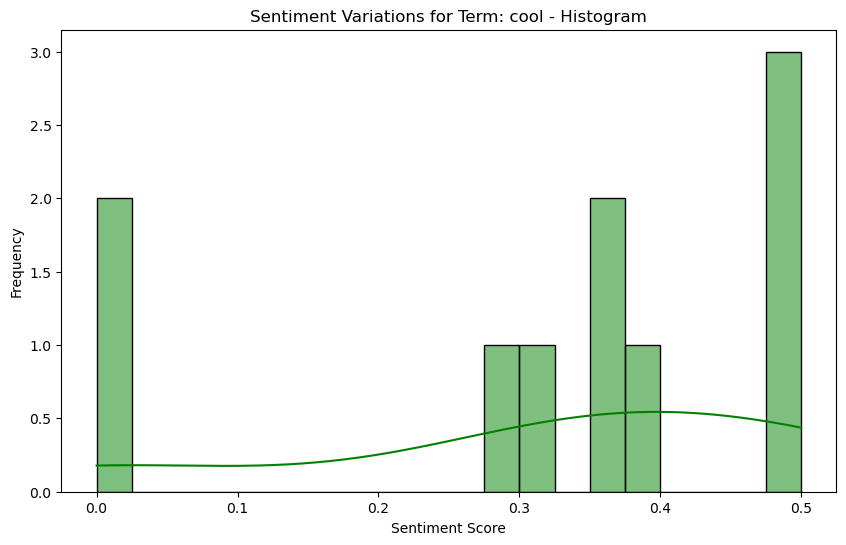

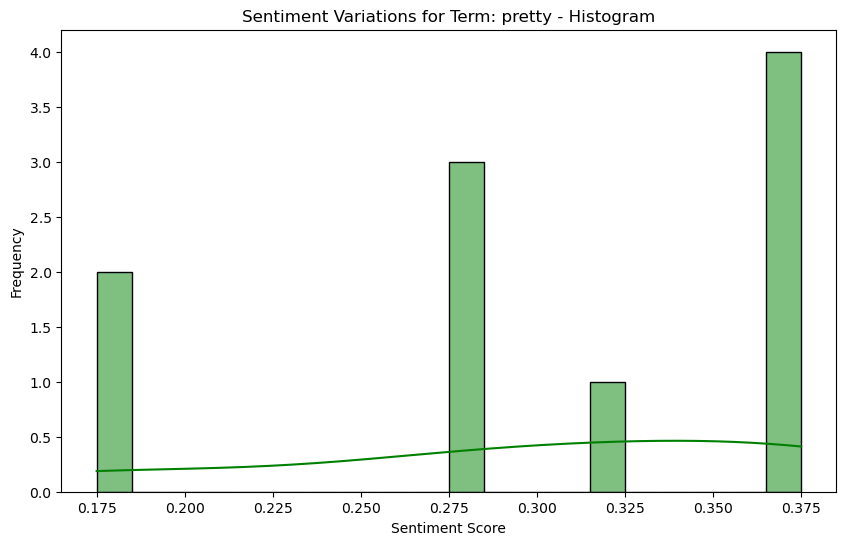

In [2]:
from wordcloud import WordCloud
import os
import re
import pandas as pd
from moviepy.editor import VideoFileClip
from pydub import AudioSegment
import speech_recognition as sr
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# Use of a function to specify the video file path, extract audio segments from the video, and store the audio segments
# as individual MP3 files in a specified output folder.

def split_and_extract_audio(video_path, output_folder, segment_length=300):
    """
    Splits Truely.com's digital video file into audio segments and the segments as individual MP3 files.

    Parameters:
    - video_path (str): Path to the video file.
    - output_folder (str): Path to the folder to store audio segments.
    - segment_length (int): Length of each audio segment in seconds.

    Returns:
    None
    """
    os.makedirs(output_folder, exist_ok=True)

    video = VideoFileClip(video_path)
    total_duration = video.duration
    num_segments = int(total_duration / segment_length)

    for i in range(num_segments):
        start_time = i * segment_length
        end_time = min((i + 1) * segment_length, total_duration)

        audio_segment = video.subclip(start_time, end_time).audio

        output_path = os.path.join(output_folder, f"segment_{i + 1}.mp3")
        audio_segment.write_audiofile(output_path)

    video.close()

# Application of another function to convert MP3 audio files to WAV format using the pydub library.

def convert_mp3_to_wav_windows(mp3_path, wav_path):
    """
    Converts an MP3 audio file to WAV format.

    Parameters:
    - mp3_path (str): Path to the MP3 file.
    - wav_path (str): Path to save the WAV file.

    Returns:
    None
    """
    audio = AudioSegment.from_mp3(mp3_path)
    audio.export(wav_path, format="wav")

#The introduction of a function to perform the following actions - 
#1. Iterate through the MP3 files in the specified folder.
#2. Converts each MP3 file to WAV format.
#3. Use Google's free Speech Recognition API to transcribe the audio to text.
#4. Split the transcribed text into sentences and add them to a list named as (sentences).
#5. Return the list of sentences.

def extract_sentences_from_audio(audio_folder):
    """
    Extracts sentences from the saved audio segments using Google Speech Recognition API.

    Parameters:
    - audio_folder (str): Path to the folder containing MP3 audio files.

    Returns:
    List of extracted sentences.
    """
    sentences = []

    for filename in os.listdir(audio_folder):
        if filename.endswith(".mp3"):
            mp3_path = os.path.join(audio_folder, filename)
            wav_path = os.path.join(audio_folder, f"{os.path.splitext(filename)[0]}.wav")

            try:
                convert_mp3_to_wav_windows(mp3_path, wav_path)

                recognizer = sr.Recognizer()

                with sr.AudioFile(wav_path) as source:
                    audio_data = recognizer.record(source)
                    text = recognizer.recognize_google(audio_data)
                    sentences.extend(text.split('. '))

            except sr.UnknownValueError:
                print(f"Could not understand audio in file: {filename}")
            except sr.RequestError as e:
                print(f"Error requesting results from Google Speech Recognition service for file {filename}: {e}")
            except Exception as e:
                print(f"Error processing file {filename}: {e}")

    return sentences

video_path = r"C:\Users\Kenechukwu\Videos\usertesting\UserTesting_4391005D.mp4"
output_folder = r"C:\Users\Kenechukwu\Videos\usertesting\output4391005D"
split_and_extract_audio(video_path, output_folder)

audio_folder = r"C:\Users\Kenechukwu\Videos\usertesting\output4391005D"

# Here the action is performed to - split_and_extract_audio to extract audio segments from the video file.
# Subsequently, extract_sentences_from_audio then transcribes and extracts sentences from the audio segments.

def break_into_sentences(extracted_sentences):
    """
    Breaks long sentences into individual sentences using spaCy.

    Parameters:
    - extracted_sentences (List[str]): List of extracted sentences.

    Returns:
    Tuple containing:
    - sentences (List[List[str]]): List of lists where each inner list contains sentences for a specific audio segment.
    - all_sentences (List[str]): Flat list containing all individual sentences.
    """
    nlp = spacy.load("en_core_web_sm")
    sentences = []
    all_sentences = []

    for i, extracted_sentence in enumerate(extracted_sentences, start=1):
        doc = nlp(extracted_sentence)
        current_sentences = [sent.text for sent in doc.sents]
        sentences.append(current_sentences)
        all_sentences.extend(current_sentences)

        for j, sentence in enumerate(current_sentences, start=1):
            print(f"Sentence {i}-{j}: {sentence}\n")

    return sentences, all_sentences
#1. sentences (a list of lists where each inner list contains sentences for a specific audio segment) 
#2. all_sentences (a flat list containing all individual sentences)

# Calling the function to get extracted sentences
extracted_sentences = extract_sentences_from_audio(audio_folder)

# Break the long sentences into individual sentences
resulting_sentences, all_sentences = break_into_sentences(extracted_sentences)

#resulting_sentences, all_sentences = break_into_sentences(extracted_sentences)

# Print the resulting sentences without the processing done on the complex sentences extracted
for i, sentence in enumerate(resulting_sentences, start=1):
    print(f"Sentence {i}: {sentence}\n")

all_text = ' '.join(all_sentences)

all_text = re.sub(r'\b(okay)\b', r'OK', all_text)
all_text = re.sub(r'\b(scream)\b', r'scroll', all_text)
all_text = re.sub(r'\b(screamed)\b', r'scroll', all_text)
all_text = re.sub(r'\b(truly)\b', r'Truely.com', all_text, flags=re.IGNORECASE)

#################
text = all_text
#################
# the level of sentiment of each sentence in resulting sentences is visualized in a table, a line chart and a bar chart. 
# and next 
# a presention of the subject topic of each sentence in resulting sentences in a table, a line chart and a bar chart.

def analyze_sentiment(sentence):
    """
    Analyzes the sentiment of a sentence using TextBlob.

    Parameters:
    - sentence (str): Input sentence.

    Returns:
    Sentiment polarity score.
    """
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity


def identify_topic(sentence):
    """
    Identifies topics in a sentence using spaCy.

    Parameters:
    - sentence (str): Input sentence.

    Returns:
    List of identified topics.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    return [token.text for token in doc if not token.is_stop and token.is_alpha]


sentiment_scores = []
topics = []

for sentences in resulting_sentences:
    for sentence in sentences:
        sentiment_scores.append(analyze_sentiment(sentence))
        try:
            topics.append(identify_topic(sentence))
        except Exception as e:
            print(f"Error identifying topics for sentence: {sentence}. Error: {e}")

df = pd.DataFrame({'Sentiment': sentiment_scores, 'Topics': topics})

# Presenting the occurrences or count of each topic for each sentence with a new column (Topic_Count)
# next,  a sorted out DataFrame based on the topic count in descending order is displayed. 
# Finally,show a bar chart plot for topic counts (from the most dominant to least dominant) 
# and a line chart for sentiment scores.

df2 = pd.DataFrame({'Sentiment': sentiment_scores, 'Topics': topics})

topic_counts = df2['Topics'].apply(len)
df2['Topic_Count'] = topic_counts

df2_sorted = df2.sort_values(by='Topic_Count', ascending=False)

# For a topic modelling based sentiment analysis - multiple visualizations.

def extract_terms(text):
    """
    Extracts relevant terms from the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    List of extracted terms.
    """
    # term extraction
    # tokenizing words and removing common stop words
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    terms = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return terms

# Starting with the list of strings into a single string
all_text = ' '.join(all_sentences)

# Replacing observed mistakes fround in the text that do not correspond with words used in video
all_text = re.sub(r'\b(okay)\b', r'OK', all_text)
all_text = re.sub(r'\b(scream)\b', r'scroll', all_text)
all_text = re.sub(r'\b(screamed)\b', r'scroll', all_text)
all_text = re.sub(r'\b(truly)\b', r'Truely.com', all_text, flags=re.IGNORECASE)

# Extracting  terms used in the entire processed text
extracted_terms = extract_terms(all_text)

# Establishing a  DataFrame with term frequencies
term_counts = pd.Series(extracted_terms).value_counts().head(30).reset_index()
term_counts.columns = ['Term', 'Frequency']

# multiple visualizations to observe an aspect based sentiment analysis.
def identify_sentences_with_terms(sentences, terms):
    """
    Identify sentences containing specific terms.

    Parameters:
    - sentences (List[List[str]]): List of lists where each inner list contains sentences for a specific audio segment.
    - terms (List[str]): List of terms to identify in the sentences.

    Returns:
    DataFrame containing information about sentences with specified terms.
    """
    term_mentions = {term: [] for term in terms}
    
    for i, sentence_list in enumerate(sentences, start=1):
        for j, sentence in enumerate(sentence_list, start=1):
            for term in terms:
                if term.lower() in sentence.lower():
                    term_mentions[term].append({
                        'Sentence Number': i,
                        'Sentence Index': j,
                        'Sentence': sentence
                    })

    return term_mentions

# An example of terms to identify in the text
terms_to_identify = ['not good', 'improve', "don't like", 'prefer', 'like this', 'try', 'better', 'think', 'best' , 'cool', 'pretty']

# Identifying sentences with the specified terms
term_mentions = identify_sentences_with_terms(resulting_sentences, terms_to_identify)

# Drawing up the dataframe from which the visualization of the specified terms can be observed
df_terms = pd.DataFrame()

for term, mentions in term_mentions.items():
    df_term = pd.DataFrame(mentions)
    df_term['Term'] = term
    df_terms = pd.concat([df_terms, df_term], ignore_index=True)

# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(df['Sentiment'], marker='o', color='green')
plt.title('Sentiment Analysis - Line Chart')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(df.index, df['Sentiment'], color='blue')
plt.title('Sentiment Analysis - Bar Chart')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.show()

### For Topic Identification Visualization:
# Ensure 'Topics' column is present in the DataFrame
if 'Topics' in df.columns:
    topic_counts = df['Topics'].apply(len)
    df['Topic_Count'] = topic_counts

    # Sort the DataFrame based on the topic count in descending order
    df_sorted = df.sort_values(by='Topic_Count', ascending=False)

    # Line Chart for Topic Identification
    plt.figure(figsize=(10, 5))
    plt.plot(df_sorted['Topic_Count'], marker='o', color='purple')
    plt.title('Topic Identification - Line Chart')
    plt.xlabel('Sentence Index')
    plt.ylabel('Topic Count')
    plt.show()

    # Bar Chart for Topic Identification
    plt.figure(figsize=(10, 5))
    plt.bar(df_sorted.index, df_sorted['Topic_Count'], color='orange')
    plt.title('Topic Identification - Bar Chart')
    plt.xlabel('Sentence Index')
    plt.ylabel('Topic Count')
    plt.show()

## Aspect based sentiment analysis
# Line Chart
plt.figure(figsize=(10, 5))
df_terms['Term'].value_counts().sort_values(ascending=False).plot(kind='line', marker='o', color='skyblue')
plt.title('Aspect-Based Term Mentions - Line Chart')
plt.xlabel('Term')
plt.ylabel('Number of Mentions')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 5))
df_terms['Term'].value_counts().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Aspect-Based Term Mentions - Bar Chart')
plt.xlabel('Term')
plt.ylabel('Number of Mentions')
plt.show()

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Extracting terms used in the entire processed text
extracted_terms = extract_terms(all_text)

# Generating word cloud for the entire text
all_text_wordcloud = ' '.join(extracted_terms)
generate_word_cloud(all_text_wordcloud, 'Word Cloud for Entire Text')

# Generating word cloud for the top 30 terms
top_terms = term_counts['Term'].tolist()
top_terms_wordcloud = ' '.join(top_terms)
generate_word_cloud(top_terms_wordcloud, 'Word Cloud for Top 30 Terms')

# Word Cloud
wordcloud_terms = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_terms['Term'].value_counts().to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_terms, interpolation='bilinear')
plt.axis('off')
plt.title('Aspect-Based Term Mentions - Word Cloud')
plt.show()

# Histogram for Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Aspect based sentiment analysis
# Line Chart
plt.figure(figsize=(10, 5))
df_terms['Term'].value_counts().sort_values(ascending=False).plot(kind='line', marker='o', color='skyblue')
plt.title('Aspect-Based Term Mentions - Line Chart')
plt.xlabel('Term')
plt.ylabel('Number of Mentions')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 5))
df_terms['Term'].value_counts().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Aspect-Based Term Mentions - Bar Chart')
plt.xlabel('Term')
plt.ylabel('Number of Mentions')
plt.show()

# Word Cloud
wordcloud_terms = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_terms['Term'].value_counts().to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_terms, interpolation='bilinear')
plt.axis('off')
plt.title('Aspect-Based Term Mentions - Word Cloud')
plt.show()

# Histogram for Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Sentiment variations for specified terms
for term in terms_to_identify:
    term_df = df_terms[df_terms['Term'] == term]

    # Histogram for Sentiment Variations for the specified term
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sentiment'].loc[term_df['Sentence Number']], bins=20, kde=True, color='green')
    plt.title(f'Sentiment Variations for Term: {term} - Histogram')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()
    